In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt # make sure you import the pyplot module correctly
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initial Setup

In [11]:
df = pd.read_csv('parkinsons.data')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [25]:
print("dataset shape:",df.shape)

dataset shape: (195, 24)


# Basic Statistics

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [31]:
print("Null Values Per Column\n",df.isnull().sum())

Null Values Per Column
 name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [33]:
print("Unique Values Per Column\n",df.nunique())

Unique Values Per Column
 name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64


# Target Class Distribution

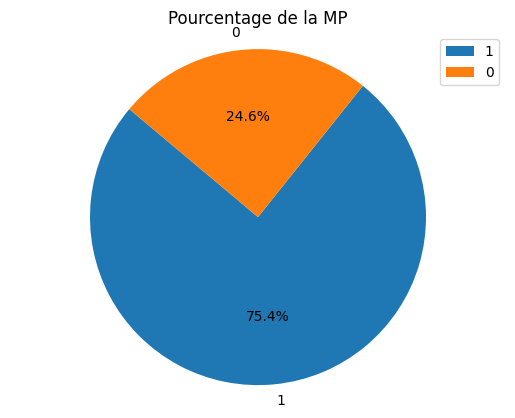

In [34]:
MP = df['status'].value_counts()
labels = MP.index
sizes = MP.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Pourcentage de la MP')
plt.legend(labels, loc="upper right")
plt.show()

# Univariate Analysis

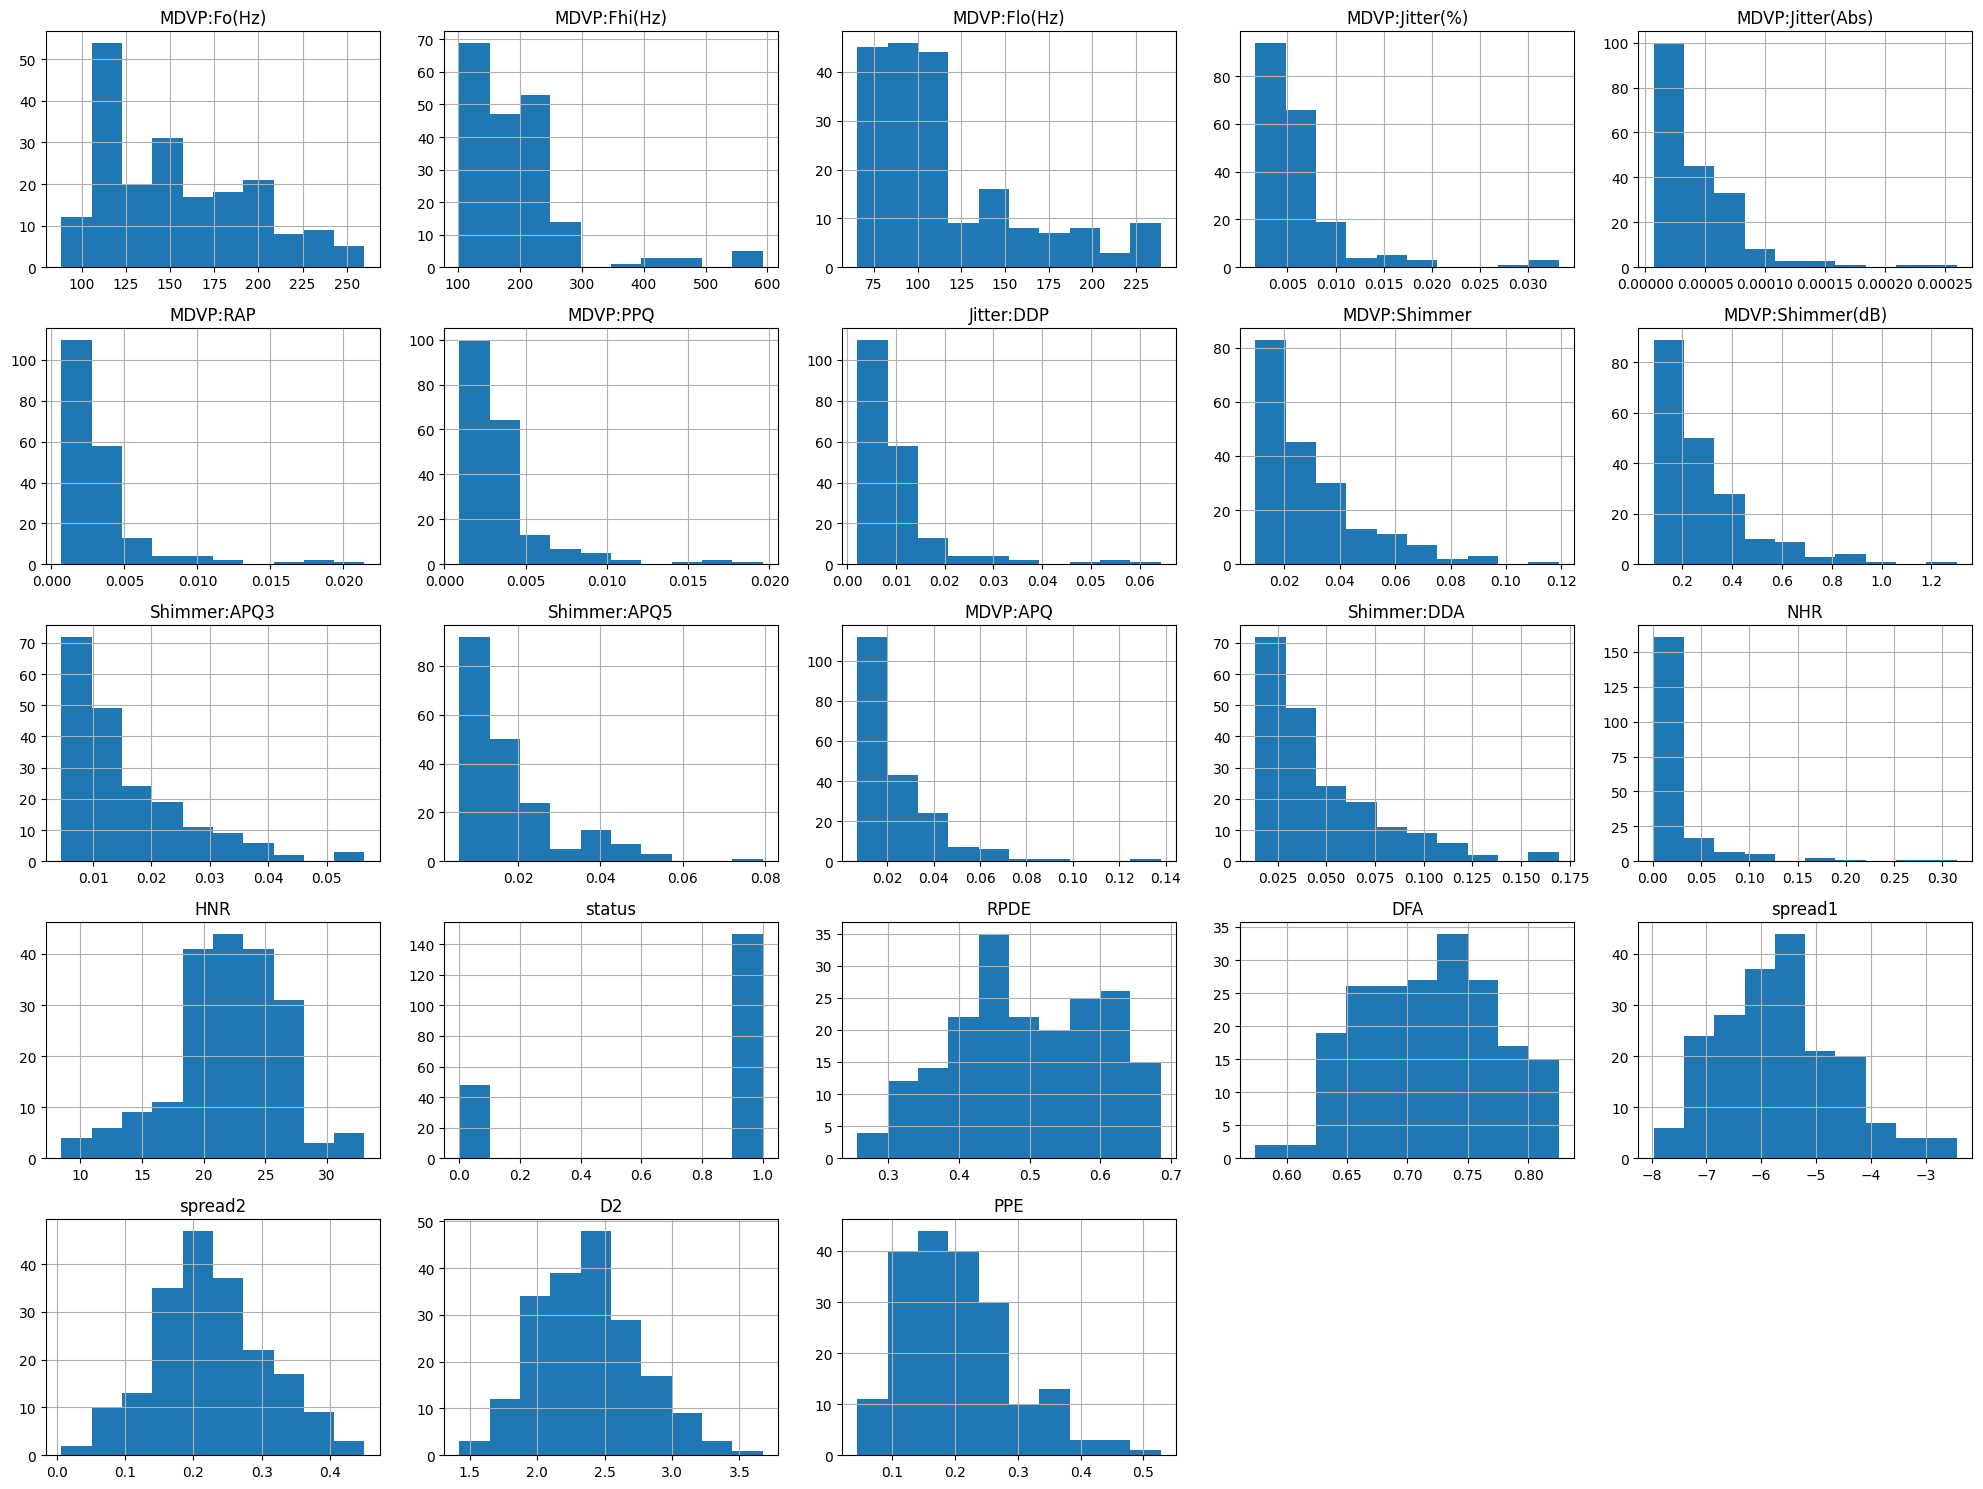

In [ ]:
# Histograms
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

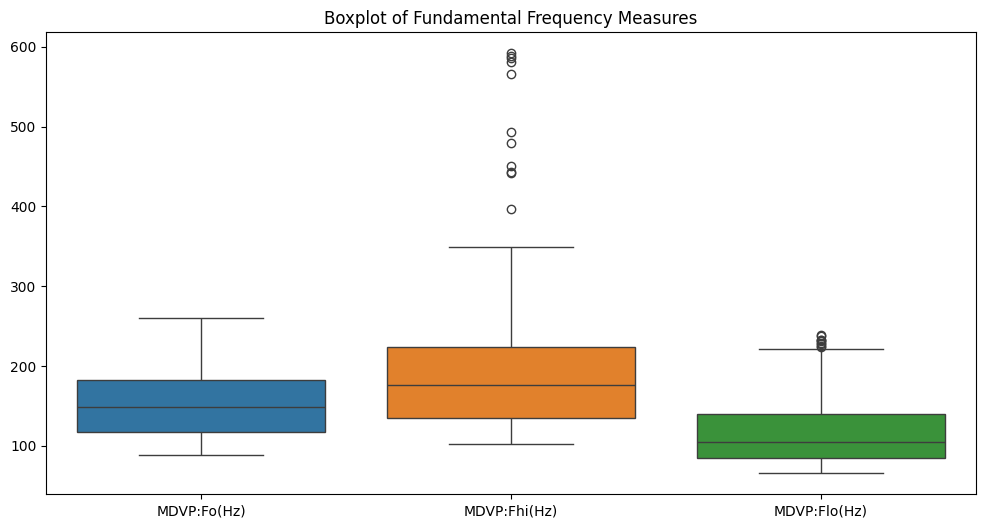

In [ ]:
# Boxplots for Frequence-related features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']])
plt.title('Boxplot of Fundamental Frequency Measures')
plt.show()

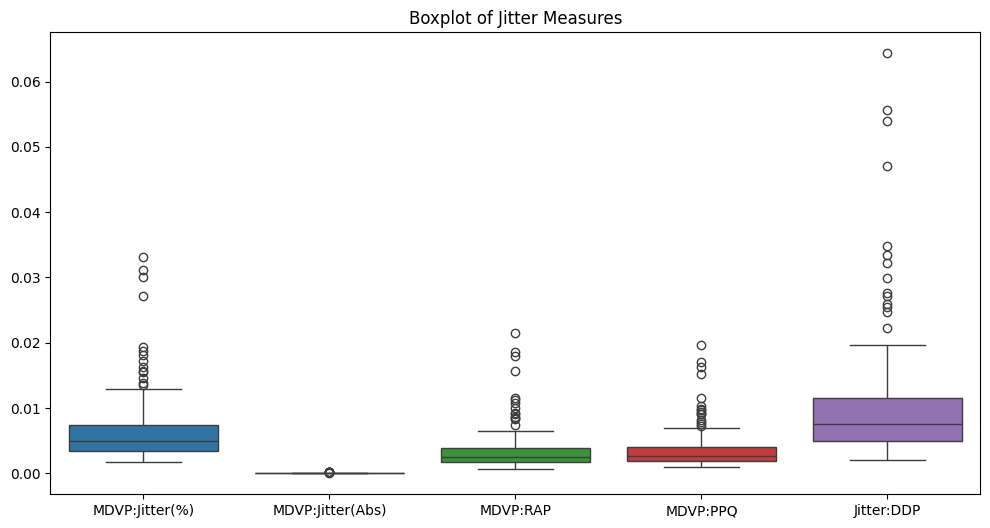

In [ ]:
# Boxplots for Jitter-Related features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MDVP:Jitter(%)','MDVP:Jitter(Abs)',	'MDVP:RAP',	'MDVP:PPQ',	'Jitter:DDP']])
plt.title('Boxplot of Jitter Measures')
plt.show()

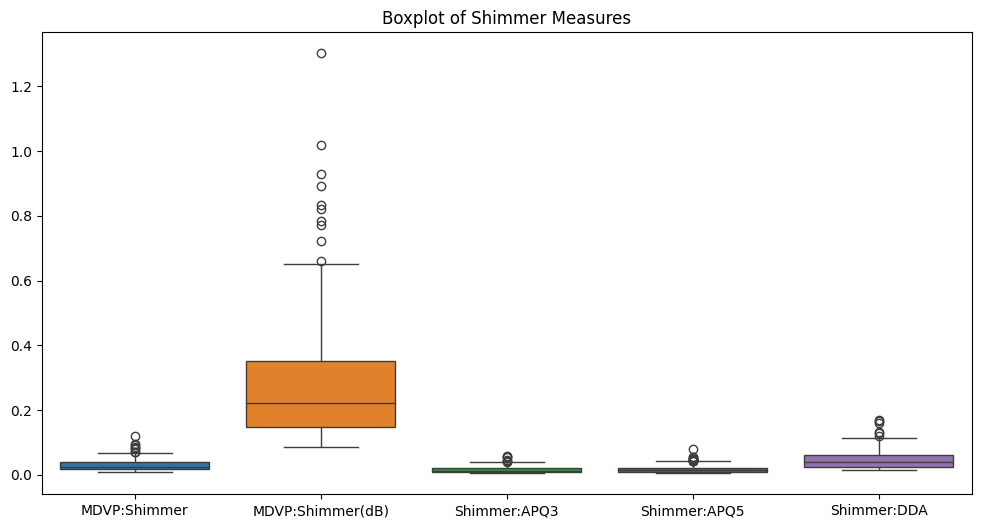

In [ ]:
# Boxplots for Shimmer-related features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MDVP:Shimmer','MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'Shimmer:DDA']])
plt.title('Boxplot of Shimmer Measures')
plt.show()


# Bivariate Analysis

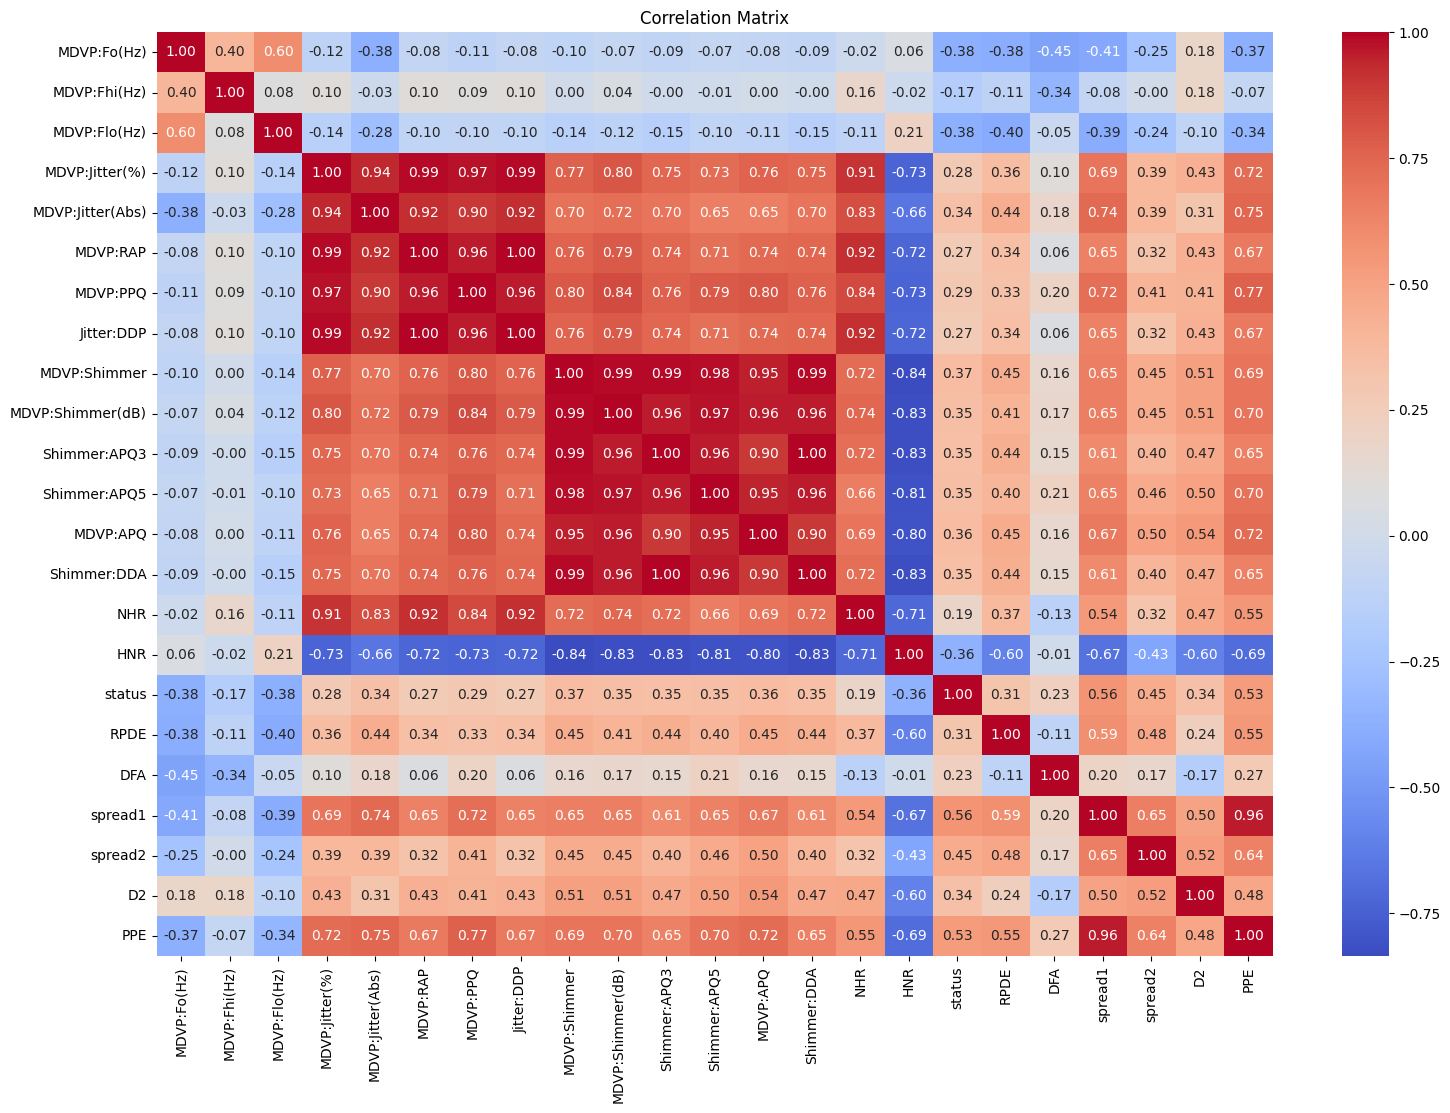

In [ ]:
# Correlation matrix
plt.figure(figsize=(18, 12))
sns.heatmap(df.drop('name', axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


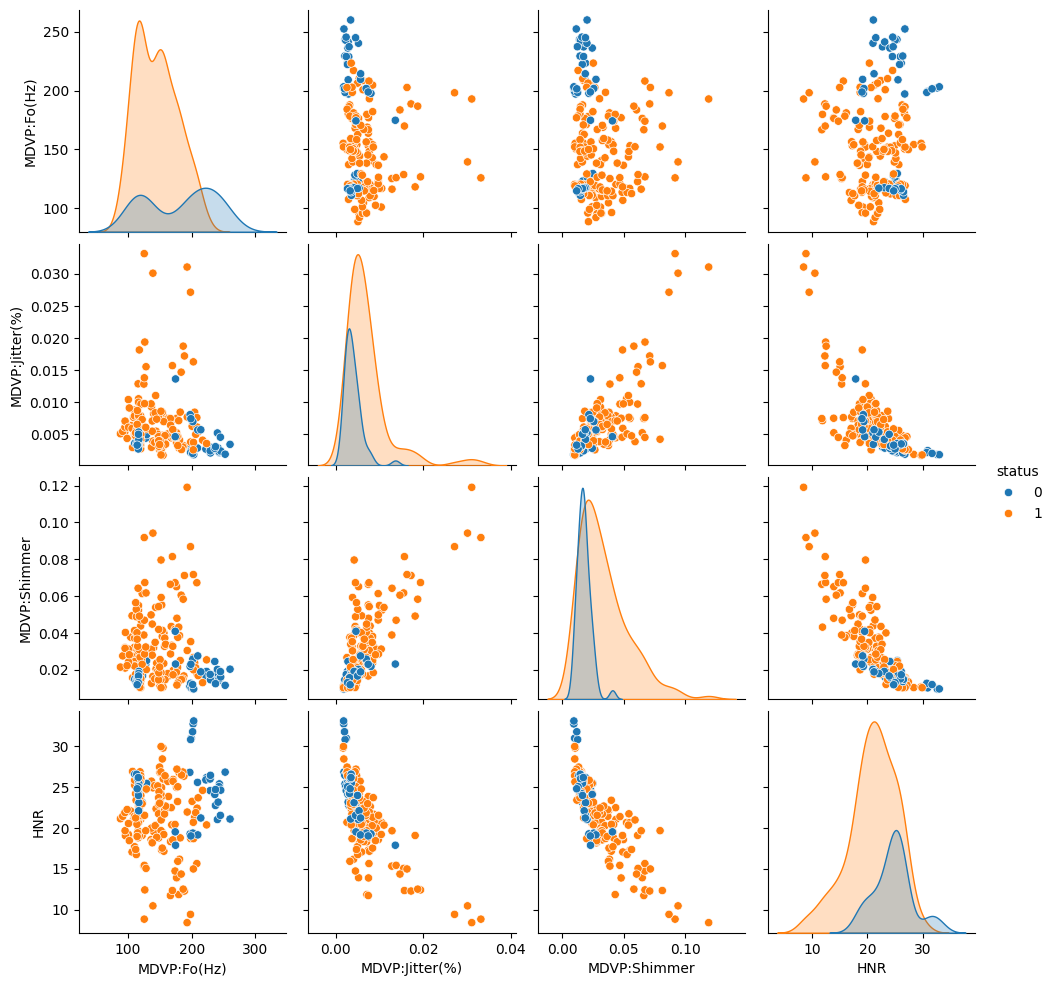

In [ ]:
# Pairplot for selected features
sns.pairplot(df[['MDVP:Fo(Hz)', 'MDVP:Jitter(%)','MDVP:Shimmer', 'HNR', 'status']], hue='status')
plt.show()

# Target Variable Analysis

In [35]:
# Compare means between groups (assuming status is binary)
status_groups = df.drop('name', axis=1).groupby('status').mean()
print(status_groups.T)

status                     0           1
MDVP:Fo(Hz)       181.937771  145.180762
MDVP:Fhi(Hz)      223.636750  188.441463
MDVP:Flo(Hz)      145.207292  106.893558
MDVP:Jitter(%)      0.003866    0.006989
MDVP:Jitter(Abs)    0.000023    0.000051
MDVP:RAP            0.001925    0.003757
MDVP:PPQ            0.002056    0.003900
Jitter:DDP          0.005776    0.011273
MDVP:Shimmer        0.017615    0.033658
MDVP:Shimmer(dB)    0.162958    0.321204
Shimmer:APQ3        0.009504    0.017676
Shimmer:APQ5        0.010509    0.020285
MDVP:APQ            0.013305    0.027600
Shimmer:DDA         0.028511    0.053027
NHR                 0.011483    0.029211
HNR                24.678750   20.974048
RPDE                0.442552    0.516816
DFA                 0.695716    0.725408
spread1            -6.759264   -5.333420
spread2             0.160292    0.248133
D2                  2.154491    2.456058
PPE                 0.123017    0.233828


<ipython-input-43-aa83893f7314>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=feature, data=df, ax=axes[i], palette='Set2')
<ipython-input-43-aa83893f7314>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=feature, data=df, ax=axes[i], palette='Set2')
<ipython-input-43-aa83893f7314>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=feature, data=df, ax=axes[i], palette='Set2')
<ipython-input-43-aa83893f7314>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

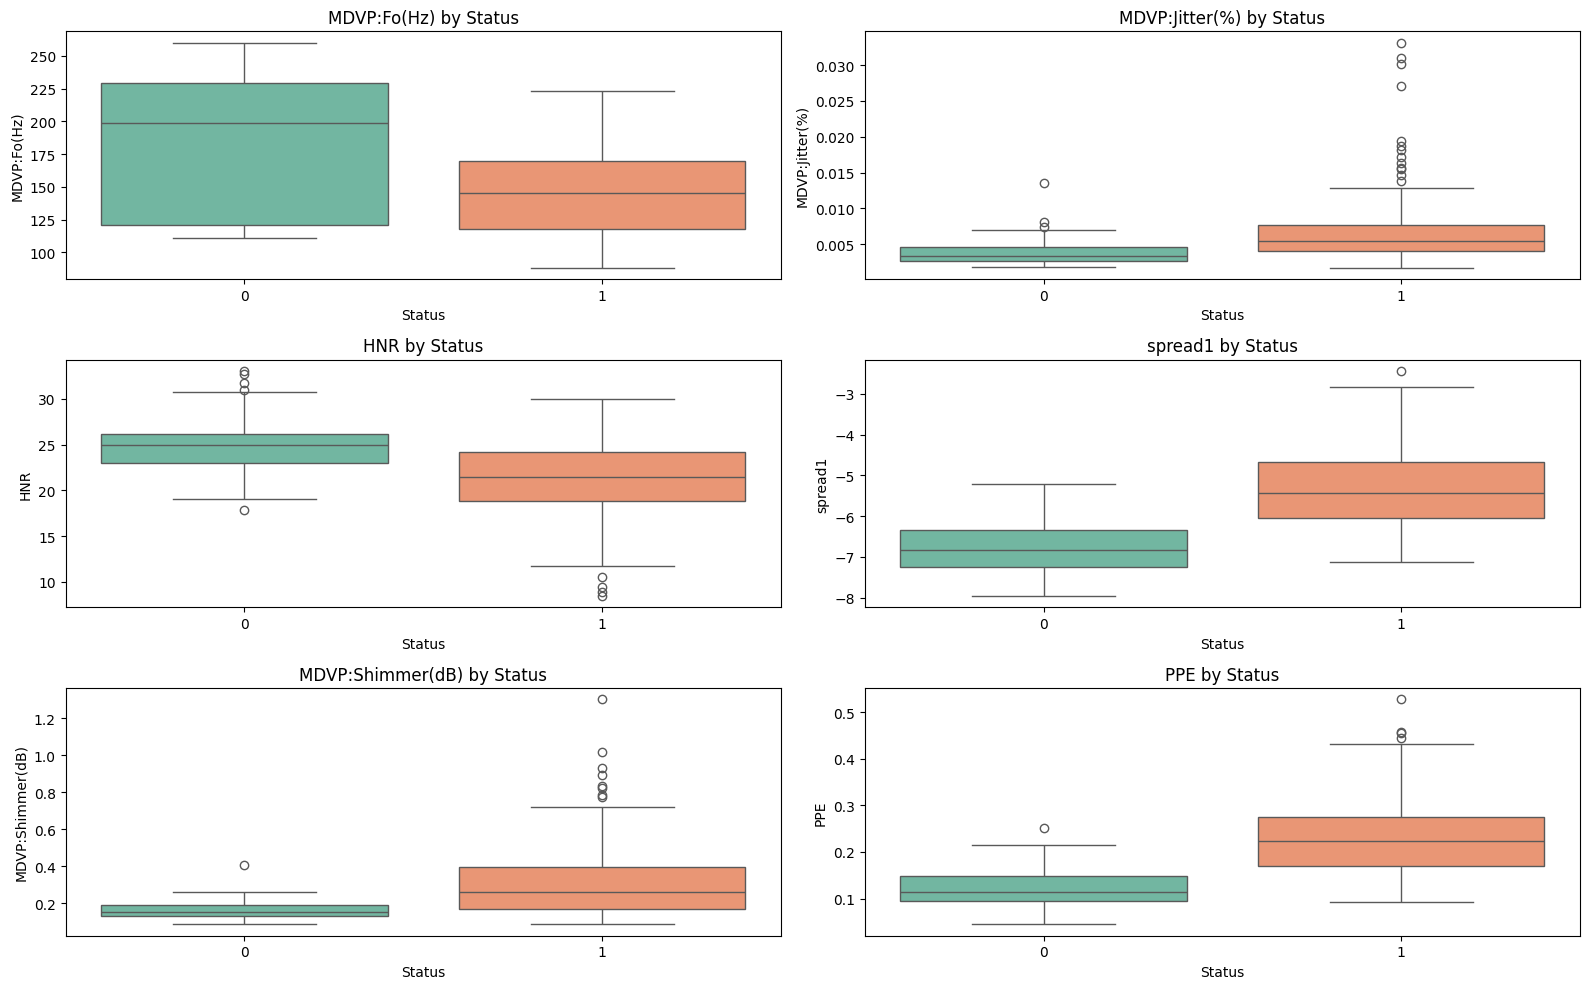

In [43]:
key_features = ['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'HNR', 'spread1', 'MDVP:Shimmer(dB)','PPE']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(key_features):
    sns.boxplot(x='status', y=feature, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} by Status')
    axes[i].set_xlabel("Status")
    axes[i].set_ylabel(f'{feature}')

# Adjust layout
plt.tight_layout()
plt.show()


In [45]:
# Check for multicollinearity
corr_matrix = df.drop('name', axis=1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Highly correlated features:", high_corr)

# You might want to drop one of each highly correlated pair

Highly correlated features: ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'PPE']


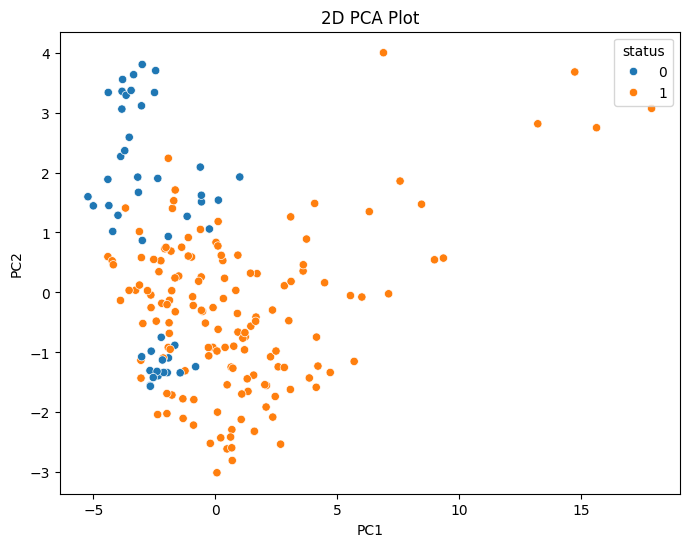

In [48]:
# PCA visualization (if you want to reduce dimensions)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['name', 'status'], axis=1))

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['status'] = df['status'].values

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='status', data=pca_df)
plt.title('2D PCA Plot')
plt.show()

In [12]:
X = df.drop(['name', 'status'], axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

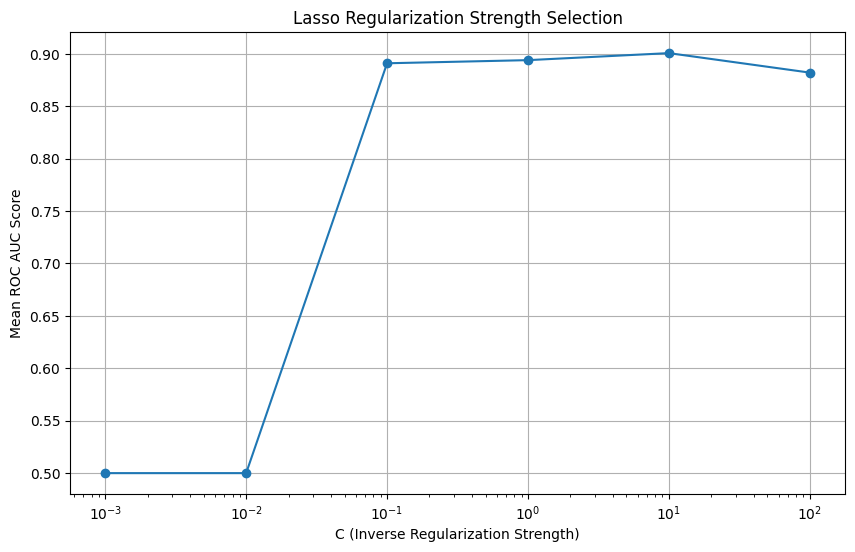

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

c_values = [0.001, 0.01, 0.1, 1, 10, 100]
cv_scores = []

for c in c_values:
   lasso = LogisticRegression(penalty='l1', C=c,solver='liblinear',random_state=42)
   scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='roc_auc')
   cv_scores.append(np.mean(scores))

# Plot performance vs C values
plt.figure(figsize=(10, 6))
plt.semilogx(c_values, cv_scores, marker='o')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Mean ROC AUC Score')
plt.title('Lasso Regularization Strength Selection')
plt.grid()
plt.show()


In [15]:
# Select best C
best_c = c_values[np.argmax(cv_scores)]
print(f"Optimal C value: {best_c}")

Optimal C value: 10


In [21]:
lasso = LogisticRegression(penalty='l1', C=best_c,solver='liblinear',random_state=42)
lasso.fit(X_train, y_train)
selected_features = X.columns[lasso.coef_[0] > 0]
print("Selected Features:", selected_features)

Selected Features: Index(['MDVP:RAP', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'MDVP:APQ', 'NHR', 'HNR',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [23]:
# Get coefficients
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lasso.coef_[0],
    'abs_coef': np.abs(lasso.coef_[0])
}).sort_values('abs_coef', ascending=False)

print("\nFeature coefficients:")
print(coef_df)


Feature coefficients:
             feature  coefficient  abs_coef
12          MDVP:APQ     6.897774  6.897774
6           MDVP:PPQ    -3.544441  3.544441
5           MDVP:RAP     3.336272  3.336272
7         Jitter:DDP     2.712802  2.712802
13       Shimmer:DDA    -2.258073  2.258073
3     MDVP:Jitter(%)    -2.124985  2.124985
18           spread1     1.549305  1.549305
10      Shimmer:APQ3    -1.545260  1.545260
4   MDVP:Jitter(Abs)    -1.347853  1.347853
21               PPE     1.266497  1.266497
9   MDVP:Shimmer(dB)     1.171796  1.171796
11      Shimmer:APQ5    -0.730715  0.730715
15               HNR     0.541759  0.541759
20                D2     0.516008  0.516008
14               NHR     0.433076  0.433076
19           spread2     0.411765  0.411765
1       MDVP:Fhi(Hz)    -0.350024  0.350024
16              RPDE    -0.304044  0.304044
0        MDVP:Fo(Hz)    -0.026016  0.026016
2       MDVP:Flo(Hz)     0.000000  0.000000
8       MDVP:Shimmer     0.000000  0.000000
17       

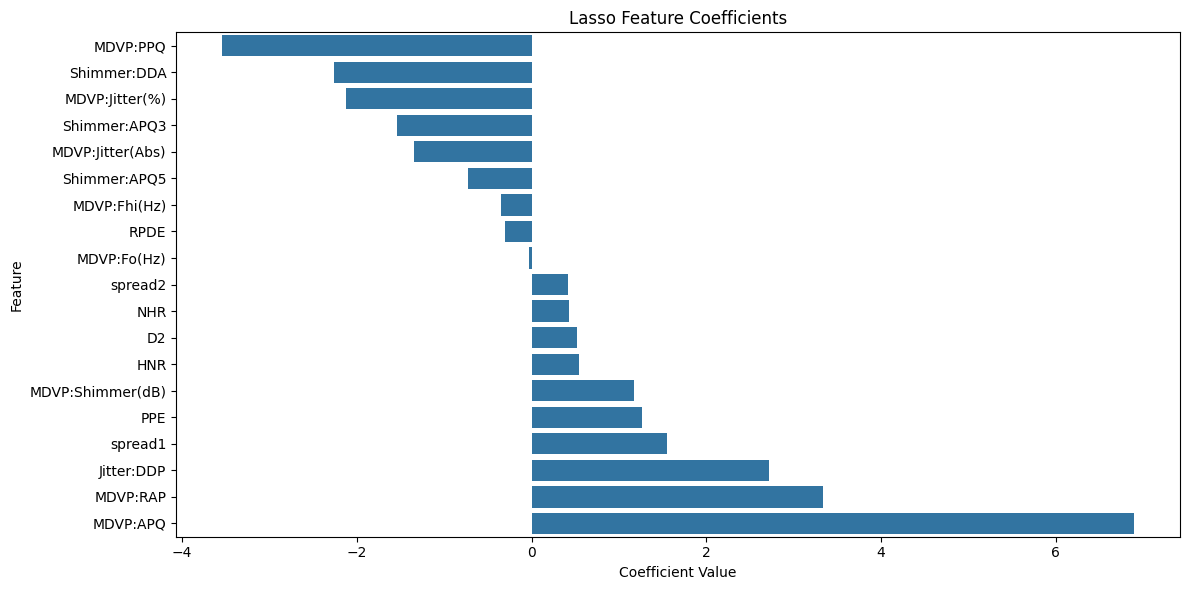

In [24]:
# Plot feature coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='coefficient', y='feature',
            data=coef_df[coef_df['abs_coef'] > 0].sort_values('coefficient'))
plt.title('Lasso Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
features = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)',	'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'HNR', 'RPDE','spread1','spread2', 'PPE','D2']
df_features= df[features]
df_labels = df['status']
df_features.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:Shimmer,HNR,RPDE,spread1,spread2,PPE,D2
0,119.992,157.302,74.997,0.00007,0.04374,21.033,0.414783,-4.813031,0.266482,0.284654,2.301442
1,122.400,148.650,113.819,0.00008,0.06134,19.085,0.458359,-4.075192,0.335590,0.368674,2.486855
2,116.682,131.111,111.555,0.00009,0.05233,20.651,0.429895,-4.443179,0.311173,0.332634,2.342259
3,116.676,137.871,111.366,0.00009,0.05492,20.644,0.434969,-4.117501,0.334147,0.368975,2.405554
4,116.014,141.781,110.655,0.00011,0.06425,19.649,0.417356,-3.747787,0.234513,0.410335,2.332180


In [ ]:
# use MinMaxScaler
scaler = MinMaxScaler ((-1, 1))
x = scaler.fit_transform(df_features)
x

array([[-0.63138346, -0.77481654, -0.89037042, ...,  0.17153026,
        -0.0053808 , -0.21867743],
       [-0.6033463 , -0.81013911, -0.4433544 , ...,  0.48267409,
         0.34265204, -0.05370956],
       [-0.66992292, -0.88174367, -0.46942324, ...,  0.37274182,
         0.19336492, -0.18236124],
       ...,
       [ 0.00546073, -0.43717403, -0.89854572, ..., -0.31484696,
        -0.63884033,  0.11793486],
       [ 0.28578581,  0.20361309, -0.89144127, ..., -0.09423055,
        -0.67372646, -0.36355605],
       [ 0.46654868, -0.35441175, -0.85610326, ..., -0.16981039,
        -0.5690805 ,  0.00734563]])

In [ ]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, df_labels, test_size=0.2, random_state=7)

In [ ]:
def tune_model(model, params, name, cv):
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, params, cv=cv, scoring='f1', n_jobs=-1)
    grid.fit(x_train, y_train)
    print(f"{name} Best F1 Score: {grid.best_score_:.4f}")
    print(f"{name} Best Params: {grid.best_params_}\n")
    return grid.best_estimator_

In [ ]:
def evaluate_model(model, x_test, y_test, name):
    preds = model.predict(x_test)
    print(f"--- {name} Evaluation ---")
    print(f"Accuracy:  {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds):.4f}")
    print(f"Recall:    {recall_score(y_test, preds):.4f}")
    print(f"F1 Score:  {f1_score(y_test, preds):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


models_and_params = {
    'RandomForest': (
        RandomForestClassifier(),
        {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    ),
    'SVM': (
        SVC(probability=True),
        {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'kernel': ['rbf']
        }
    ),
    'LogisticRegression': (
        LogisticRegression(max_iter=1000),
        {
            'C': [0.01, 0.1, 1, 10]
        }
    ),
    'GradientBoosting': (
        GradientBoostingClassifier(),
        {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    ),
    'XGBoost': (
        XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        {
            'n_estimators': [50, 100],
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1]
        }
    )
}


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier
import joblib
# Tune all models
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
best_models = {}

for name, (model, params) in models_and_params.items():
    best_model = tune_model(model, params, name, cv)
    best_models[name] = best_model
    evaluate_model(best_model, x_test, y_test, name)

# Optional: Save all models
for name, model in best_models.items():
    joblib.dump(model, f'{name}_model.pkl')


Tuning RandomForest...
RandomForest Best F1 Score: 0.9452
RandomForest Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

--- RandomForest Evaluation ---
Accuracy:  0.9487
Precision: 0.9412
Recall:    1.0000
F1 Score:  0.9697
Confusion Matrix:
 [[ 5  2]
 [ 0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

Tuning SVM...
SVM Best F1 Score: 0.9152
SVM Best Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

--- SVM Evaluation ---
Accuracy:  0.9231
Precision: 0.9143
Recall:    1.0000
F1 Score:  0.9552
Confusion Matrix:
 [[ 4  3]
 [ 0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.73 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Best F1 Score: 0.9309
XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

--- XGBoost Evaluation ---
Accuracy:  0.9487
Precision: 0.9412
Recall:    1.0000
F1 Score:  0.9697
Confusion Matrix:
 [[ 5  2]
 [ 0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



#dddd

In [ ]:
from sklearn.model_selection import StratifiedKFold

best_models = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, (model, params) in models_and_params.items():
    grid = GridSearchCV(model, params, cv=cv, scoring='f1', n_jobs=-1)
    grid.fit(x, df_labels)
    best_models[name] = (grid.best_estimator_, grid.best_score_)
    print(f"{name} Best Score: {grid.best_score_:.4f}")
    print(f"{name} Best Params: {grid.best_params_}\n")


InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'f1_samples', 'adjusted_rand_score', 'fowlkes_mallows_score', 'rand_score', 'recall_micro', 'precision_micro', 'jaccard_macro', 'neg_brier_score', 'neg_root_mean_squared_error', 'precision_macro', 'jaccard_samples', 'precision_weighted', 'adjusted_mutual_info_score', 'roc_auc_ovr', 'neg_mean_gamma_deviance', 'f1_macro', 'recall_samples', 'average_precision', 'mutual_info_score', 'roc_auc_ovr_weighted', 'precision', 'neg_log_loss', 'jaccard', 'v_measure_score', 'neg_median_absolute_error', 'f1_micro', 'recall', 'd2_absolute_error_score', 'neg_negative_likelihood_ratio', 'accuracy', 'neg_mean_squared_log_error', 'recall_weighted', 'explained_variance', 'jaccard_weighted', 'neg_mean_poisson_deviance', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_root_mean_squared_log_error', 'homogeneity_score', 'precision_samples', 'roc_auc', 'positive_likelihood_ratio', 'completeness_score', 'balanced_accuracy', 'matthews_corrcoef', 'f1', 'neg_mean_absolute_error', 'normalized_mutual_info_score', 'r2', 'jaccard_micro', 'f1_weighted', 'neg_max_error', 'top_k_accuracy', 'roc_auc_ovo_weighted', 'roc_auc_ovo', 'recall_macro'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got 'Accuracy' instead.

In [ ]:
# Find the best performing model
best_model_name = max(best_models, key=lambda name: best_models[name][1])
best_model = best_models[best_model_name][0]

print(f"Selected Best Model: {best_model_name}")

# Save the model
joblib.dump(best_model, f"{best_model_name}_model.pkl")


Selected Best Model: XGBoost


['XGBoost_model.pkl']

In [ ]:
selected_models = {
    'RandomForest': best_models['RandomForest'],
    'SVM': best_models['SVM'],
}

In [ ]:
from sklearn.ensemble import VotingClassifier

# Extract the selected estimators
voting_estimators = [(name, model) for name, (model, _) in selected_models.items()]

# Initialize VotingClassifier (majority vote)
voting_clf = VotingClassifier(
    estimators=voting_estimators,
    voting='hard'  # Use 'soft' if models support predict_proba
)

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validate (using your existing StratifiedKFold)
cv_scores = cross_val_score(
    voting_clf,
    x,              # Feature matrix
    df_labels,      # Target labels
    cv=cv,          # Your predefined StratifiedKFold
    scoring='f1',   # Metric (match GridSearch)
    n_jobs=-1
)

print(f"Voting Classifier (Subset) F1: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Voting Classifier (Subset) F1: 0.9524 (±0.0171)


In [ ]:
for name, (_, score) in selected_models.items():
    print(f"{name}: {score:.4f}")
print(f"Voting (Subset): {cv_scores.mean():.4f}")

RandomForest: 0.9509
SVM: 0.9533
Voting (Subset): 0.9522


In [ ]:
# Load a single model
loaded_model = joblib.load('SVM_model.pkl')



In [ ]:
import pandas as pd

# Example: New data (replace with your actual data)
new_sample = {
    'MDVP:Fo(Hz)': 119.992,
    'MDVP:Fhi(Hz)': 157.302,
    'MDVP:Flo(Hz)': 74.997,
    'MDVP:Jitter(Abs)': 0.00007,
    'MDVP:Shimmer': 0.04374,
    'HNR': 21.033,
    'RPDE': 0.414783,
    'spread1': -4.813031,
    'spread2': 0.266482,
    'PPE': 0.284654,
    'D2': 2.301442
}

new_data = pd.DataFrame([new_sample])


scaler = joblib.load('scaler.pkl')  # Assuming you saved it earlier
new_data_scaled = scaler.transform(new_data)

In [ ]:
# Predict with a single model
prediction = loaded_model.predict(new_data_scaled)
prediction

np.int64(1)


Feature ranking:
1. PPE: 0.1171
2. spread1: 0.1143
3. MDVP:Fo(Hz): 0.0890
4. spread2: 0.0671
5. NHR: 0.0550
6. Shimmer:APQ5: 0.0484
7. Jitter:DDP: 0.0474
8. MDVP:RAP: 0.0455
9. MDVP:Flo(Hz): 0.0449
10. MDVP:Fhi(Hz): 0.0405
11. MDVP:APQ: 0.0357
12. DFA: 0.0335
13. D2: 0.0332
14. MDVP:Jitter(Abs): 0.0328
15. RPDE: 0.0307
16. MDVP:PPQ: 0.0285
17. MDVP:Jitter(%): 0.0254
18. MDVP:Shimmer(dB): 0.0246
19. Shimmer:APQ3: 0.0245
20. MDVP:Shimmer: 0.0240
21. Shimmer:DDA: 0.0192
22. HNR: 0.0188

Selected Features: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'Jitter:DDP', 'Shimmer:APQ5', 'MDVP:APQ', 'spread1', 'spread2', 'PPE']

Tuning RandomForest...
RandomForest Best F1 Score (CV): 0.9376
RandomForest Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

--- RandomForest Evaluation ---
Accuracy:  0.9231
Precision: 0.9333
Recall:    0.9655
F1 Score:  0.9492
Confusion Matrix:
 [[ 8  2]
 [ 1 28]]
Classification Report:
               prec

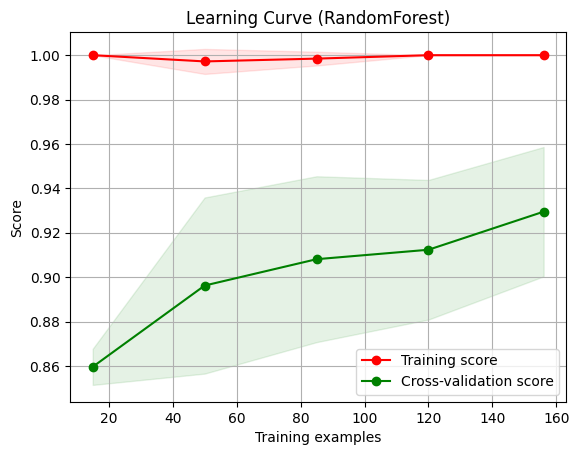


Evaluating RandomForest with selected features...

--- RandomForest_important Evaluation ---
Accuracy:  0.9487
Precision: 0.9655
Recall:    0.9655
F1 Score:  0.9655
Confusion Matrix:
 [[ 9  1]
 [ 1 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39

Cross-validated F1: 0.9311 (+/- 0.0388)


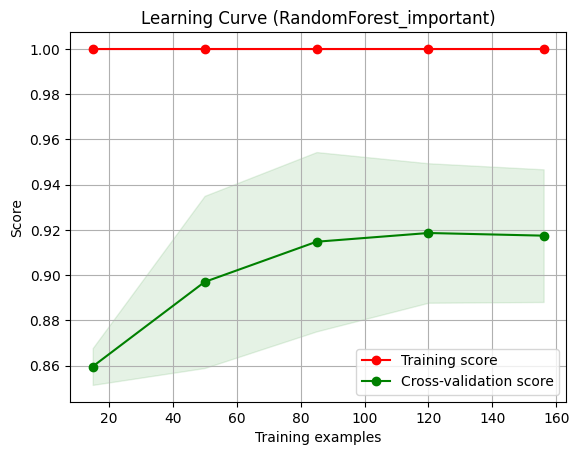


Tuning SVM...
SVM Best F1 Score (CV): 0.8328
SVM Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

--- SVM Evaluation ---
Accuracy:  0.7949
Precision: 0.9565
Recall:    0.7586
F1 Score:  0.8462
Confusion Matrix:
 [[ 9  1]
 [ 7 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.90      0.69        10
           1       0.96      0.76      0.85        29

    accuracy                           0.79        39
   macro avg       0.76      0.83      0.77        39
weighted avg       0.86      0.79      0.81        39

Cross-validated F1: 0.8390 (+/- 0.0348)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py", line 207, in fit
    y = self._validate_targets(y)
        

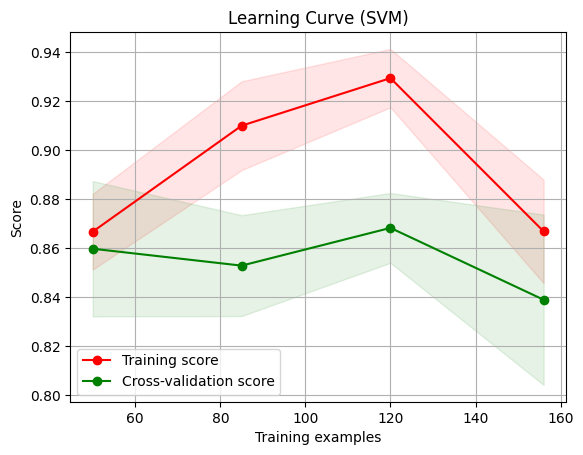


Tuning LogisticRegression...
LogisticRegression Best F1 Score (CV): 0.8390
LogisticRegression Best Params: {'C': 0.1, 'solver': 'liblinear'}

--- LogisticRegression Evaluation ---
Accuracy:  0.7949
Precision: 1.0000
Recall:    0.7241
F1 Score:  0.8400
Confusion Matrix:
 [[10  0]
 [ 8 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.72      0.84        29

    accuracy                           0.79        39
   macro avg       0.78      0.86      0.78        39
weighted avg       0.89      0.79      0.81        39

Cross-validated F1: 0.8294 (+/- 0.0218)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.interce

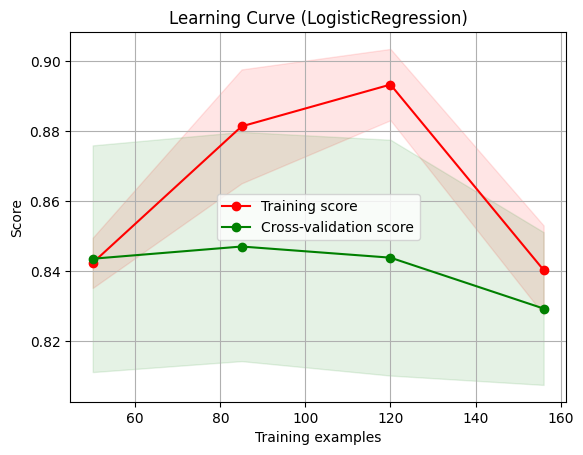


Tuning GradientBoosting...
GradientBoosting Best F1 Score (CV): 0.9424
GradientBoosting Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

--- GradientBoosting Evaluation ---
Accuracy:  0.9744
Precision: 0.9667
Recall:    1.0000
F1 Score:  0.9831
Confusion Matrix:
 [[ 9  1]
 [ 0 29]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39

Cross-validated F1: 0.9431 (+/- 0.0269)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py", line 669, in fit
    y = self._encode_y(y=y, sample_weig

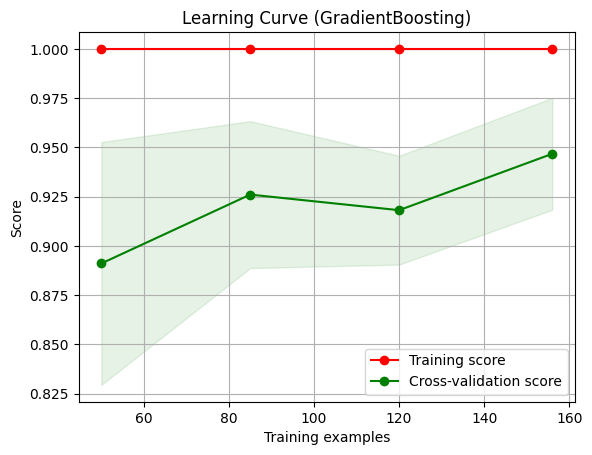


Evaluating GradientBoosting with selected features...

--- GradientBoosting_important Evaluation ---
Accuracy:  0.9744
Precision: 0.9667
Recall:    1.0000
F1 Score:  0.9831
Confusion Matrix:
 [[ 9  1]
 [ 0 29]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39

Cross-validated F1: 0.9468 (+/- 0.0284)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py", line 669, in fit
    y = self._encode_y(y=y, sample_weig

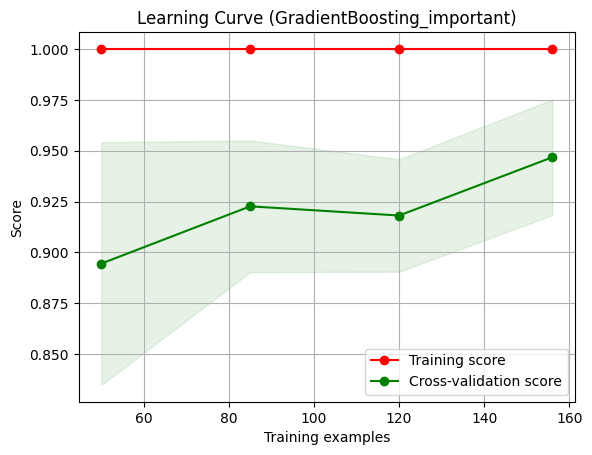


Tuning XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Best F1 Score (CV): 0.9378
XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

--- XGBoost Evaluation ---
Accuracy:  0.9744
Precision: 0.9667
Recall:    1.0000
F1 Score:  0.9831
Confusion Matrix:
 [[ 9  1]
 [ 0 29]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Cross-validated F1: 0.9448 (+/- 0.0233)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1559, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expec

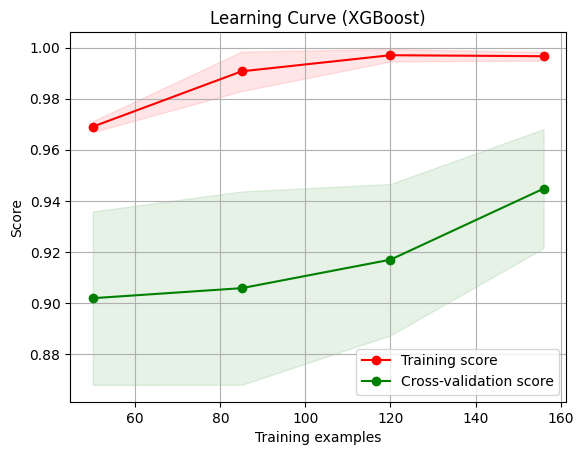

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluating XGBoost with selected features...

--- XGBoost_important Evaluation ---
Accuracy:  0.9744
Precision: 0.9667
Recall:    1.0000
F1 Score:  0.9831
Confusion Matrix:
 [[ 9  1]
 [ 0 29]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validated F1: 0.9527 (+/- 0.0192)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1559, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expec

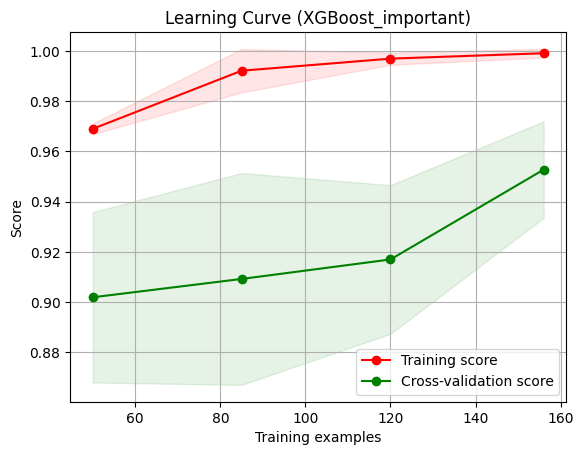

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Voting Classifier Evaluation ---
Accuracy:  0.9744
Precision: 0.9667
Recall:    1.0000
F1 Score:  0.9831
Confusion Matrix:
 [[ 9  1]
 [ 0 29]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validated F1: 0.9431 (+/- 0.0269)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  

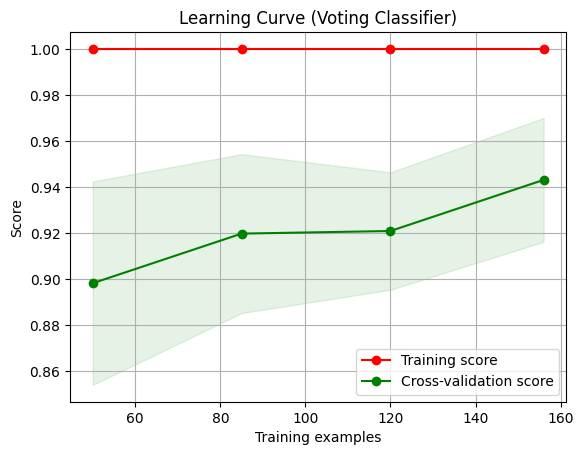


Best model (GradientBoosting) saved to best_model.pkl


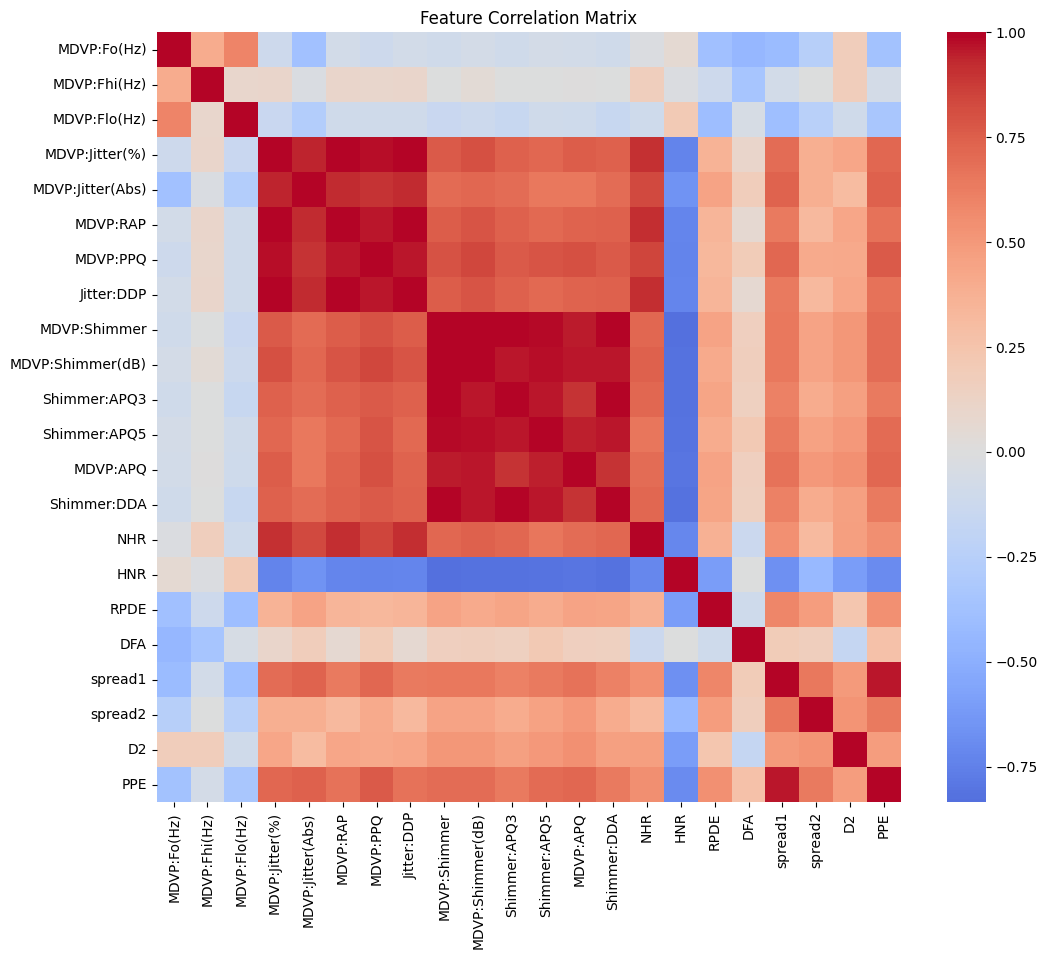

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
import joblib
# Feature selection (dropping name column)
features = df.drop(['name', 'status'], axis=1)
labels = df['status']

# Feature scaling
scaler = MinMaxScaler((-1, 1))
x = scaler.fit_transform(features)
joblib.dump(scaler, 'scaler.pkl')

# Train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size=0.2,
                                                  random_state=7, stratify=labels)

# Define models with balanced class weights
models_and_params = {
    'RandomForest': (
        RandomForestClassifier(class_weight='balanced'),
        {
            'n_estimators': [50, 100],
            'max_depth': [None, 5],
            'min_samples_split': [2, 5]
        }
    ),
    'SVM': (
        SVC(probability=True, class_weight='balanced'),
        {
            'C': [0.1, 1],  # Reduced complexity
            'gamma': ['scale'],
            'kernel': ['rbf', 'linear']  # Added linear kernel
        }
    ),
    'LogisticRegression': (
        LogisticRegression(max_iter=1000, class_weight='balanced'),
        {
            'C': [0.01, 0.1, 1],
            'solver': ['liblinear']
        }
    ),
    'GradientBoosting': (
        GradientBoostingClassifier(),
        {
            'n_estimators': [100],
            'learning_rate': [0.1],
            'max_depth': [3]
        }
    ),
    'XGBoost': (
        XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                     scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])),
        {
            'n_estimators': [100],
            'max_depth': [3],
            'learning_rate': [0.1]
        }
    )
}

# Model tuning and evaluation with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_models = {}

def tune_model(model, params, name, cv):
    print(f"\nTuning {name}...")
    grid = GridSearchCV(model, params, cv=cv, scoring='f1', n_jobs=-1)
    grid.fit(x_train, y_train)
    print(f"{name} Best F1 Score (CV): {grid.best_score_:.4f}")
    print(f"{name} Best Params: {grid.best_params_}")
    return grid.best_estimator_

def evaluate_model(model, x_test, y_test, name):
    preds = model.predict(x_test)
    print(f"\n--- {name} Evaluation ---")
    print(f"Accuracy:  {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds):.4f}")
    print(f"Recall:    {recall_score(y_test, preds):.4f}")
    print(f"F1 Score:  {f1_score(y_test, preds):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

    # Cross-validated scores
    cv_scores = cross_val_score(model, x, labels, cv=cv, scoring='f1')
    print(f"Cross-validated F1: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

    # Learning curve
    plot_learning_curve(model, name, x, labels, cv=cv)

def plot_learning_curve(estimator, title, X, y, cv):
    plt.figure()
    plt.title(f"Learning Curve ({title})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='f1', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Feature importance analysis
rf = RandomForestClassifier().fit(x_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature ranking:")
for f in range(x_train.shape[1]):
    print(f"{f + 1}. {features.columns[indices[f]]}: {importances[indices[f]]:.4f}")

# Feature selection based on importance
selector = SelectFromModel(rf, threshold='median')
selector.fit(x_train, y_train)  # Fit selector on training data only
x_train_important = selector.transform(x_train)
x_test_important = selector.transform(x_test)

# Get selected feature names
selected_features = features.columns[selector.get_support()]
print("\nSelected Features:", list(selected_features))

# Train and evaluate models
for name, (model, params) in models_and_params.items():
    # Train and evaluate on full feature set
    best_model = tune_model(model, params, name, cv)
    best_models[name] = best_model
    evaluate_model(best_model, x_test, y_test, name)

    # For tree-based models, also evaluate on reduced feature set
    if name in ['RandomForest', 'GradientBoosting', 'XGBoost']:
        print(f"\nEvaluating {name} with selected features...")

        # Clone the model to avoid overwriting
        from sklearn.base import clone
        model_reduced = clone(model)

        # Set parameters from best model (if any)
        if hasattr(best_model, 'best_params_'):
            model_reduced.set_params(**best_model.best_params_)

        # Fit on reduced features
        model_reduced.fit(x_train_important, y_train)

        # Evaluate on reduced features
        evaluate_model(model_reduced, x_test_important, y_test, f"{name}_important")

        # Store the reduced model
        best_models[f"{name}_important"] = model_reduced

# Create and evaluate voting classifier
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in best_models.items()],
    voting='soft'
)
voting_clf.fit(x_train, y_train)
evaluate_model(voting_clf, x_test, y_test, "Voting Classifier")

# Save best model (GradientBoosting by default)
best_model = best_models['GradientBoosting']
joblib.dump(best_model, 'best_model.pkl')
print("\nBest model (GradientBoosting) saved to best_model.pkl")

# Feature correlation analysis
plt.figure(figsize=(12, 10))
corr_matrix = pd.DataFrame(x, columns=features.columns).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()